In [6]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [30]:
#load data 

data = "data.csv"
df = pd.read_csv(data)
df.head(5)

,Unnamed: 0,TimeFrame,Fips,Location,Population,Rent,Rent_Burden,Overcrowded,Owner,Employment_Ratio,Unemployment,Median_Income,Uninsured_No,Uninsured_Pct,Education_Level,Education_No,Education_Pct,Snap_No,Snap_Pct
0,0,2005,101,Battery Park/Tribeca,51150.45963,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,1198.0,0.04744
1,1,2005,102,Greenwich Village,75508.54037,2191.21645,0.17644,0.03794,0.26053,0.751,0.033,116703.49427,NaN,NaN,NaN,NaN,NaN,2525.0,0.05822
2,2,2005,103,Lower East Side,145556.00000,817.19484,0.23809,0.08153,0.13708,0.564,0.088,40241.54525,NaN,NaN,NaN,NaN,NaN,14828.0,0.21802
3,3,2005,104,Chelsea/Clinton,88754.39184,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,8107.0,0.15767
4,4,2005,105,Midtown Business District,44420.60816,1781.33008,0.19318,0.04339,0.20554,0.677,0.066,88613.25358,NaN,NaN,NaN,NaN,NaN,2266.0,0.09024


In [31]:
#choose data
df = df.dropna()
#csv2 = csv1[['Acceleration', 'Pressure']].copy()
df_cleaned = df[['Education_Pct', 'Population', 'Rent',
                'Overcrowded', 'Owner', 'Employment_Ratio']]
df_cleaned

,Education_Pct,Population,Rent,Overcrowded,Owner,Employment_Ratio
260,0.77175,5.659185e+04,2305.38388,0.02959,0.28839,0.707
261,0.77175,8.354115e+04,2305.38388,0.02959,0.28839,0.707
262,0.39000,1.620140e+05,963.21637,0.07759,0.13413,0.553
263,0.68675,9.828262e+04,1905.31472,0.04981,0.25009,0.681
264,0.68675,4.918938e+04,1905.31472,0.04981,0.25009,0.681
...,...,...,...,...,...,...
905,0.38864,2.582830e+06,1331.00000,0.10478,0.30561,0.603
906,0.61357,1.628701e+06,1673.00000,0.06550,0.23956,0.636
907,0.33456,2.278906e+06,1482.00000,0.13229,0.45294,0.610
908,0.34267,4.761790e+05,1153.00000,0.07854,0.69202,0.560


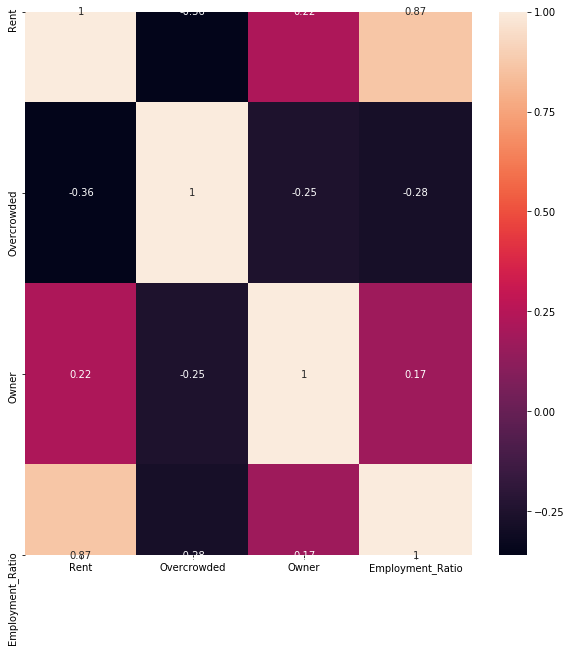

In [48]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
corrMatrix = df_cleaned[df_cleaned.columns[2:]].corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [41]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df_cleaned.drop(["Education_Pct"], axis =1)
y = df_cleaned["Education_Pct"]
y = pd.DataFrame(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)


predictions = model.predict(X_test_scaled)
r2_train = model.score(X_train_scaled, y_train_scaled)
r2_test = model.score(X_test_scaled, y_test_scaled)
#MSE = mean_squared_error(y_test_scaled, predictions)

print(f"R2 for Trained: {r2_train}")
print(f"R2 for Test: {r2_test}")


R2 for Trained: 0.8603309095202072
R2 for Test: 0.8299836703386116
